In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url1= "https://www.ndbc.noaa.gov/data/historical/stdmet/46211h2020.txt.gz"

# Load data with pandas
graysharbor = pd.read_csv(url1, 
                 compression='gzip', 
                 delim_whitespace=True, 
                 skiprows=[1])
graysharbor.describe()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,15464.0,15464.000000,15464.000000,15464.000000,15464.000000,15464.0,15464.0,15464.0,15464.000000,15464.000000,15464.000000,15464.000000,15464.0,15464.0,15464.000000,15464.0,15464.0,15464.0
mean,2020.0,7.148280,16.069710,11.519853,31.359674,999.0,99.0,99.0,1.874543,10.763823,7.310207,273.850297,9999.0,999.0,11.963936,999.0,99.0,99.0
std,0.0,3.068164,8.733247,6.927904,19.567541,0.0,0.0,0.0,1.010461,2.896345,1.724103,23.041741,0.0,0.0,2.242438,0.0,0.0,0.0
min,2020.0,1.000000,1.000000,0.000000,0.000000,999.0,99.0,99.0,0.470000,3.120000,3.470000,56.000000,9999.0,999.0,7.800000,999.0,99.0,99.0
25%,2020.0,5.000000,9.000000,6.000000,26.000000,999.0,99.0,99.0,1.180000,8.330000,6.110000,267.000000,9999.0,999.0,9.700000,999.0,99.0,99.0
50%,2020.0,7.000000,16.000000,12.000000,30.000000,999.0,99.0,99.0,1.610000,10.530000,7.090000,278.000000,9999.0,999.0,12.300000,999.0,99.0,99.0
75%,2020.0,10.000000,24.000000,18.000000,56.000000,999.0,99.0,99.0,2.290000,12.500000,8.330000,289.000000,9999.0,999.0,13.900000,999.0,99.0,99.0
max,2020.0,12.000000,31.000000,23.000000,56.000000,999.0,99.0,99.0,7.880000,22.220000,16.240000,344.000000,9999.0,999.0,17.900000,999.0,99.0,99.0


Columns after cleaning: ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE', 'DateTime']


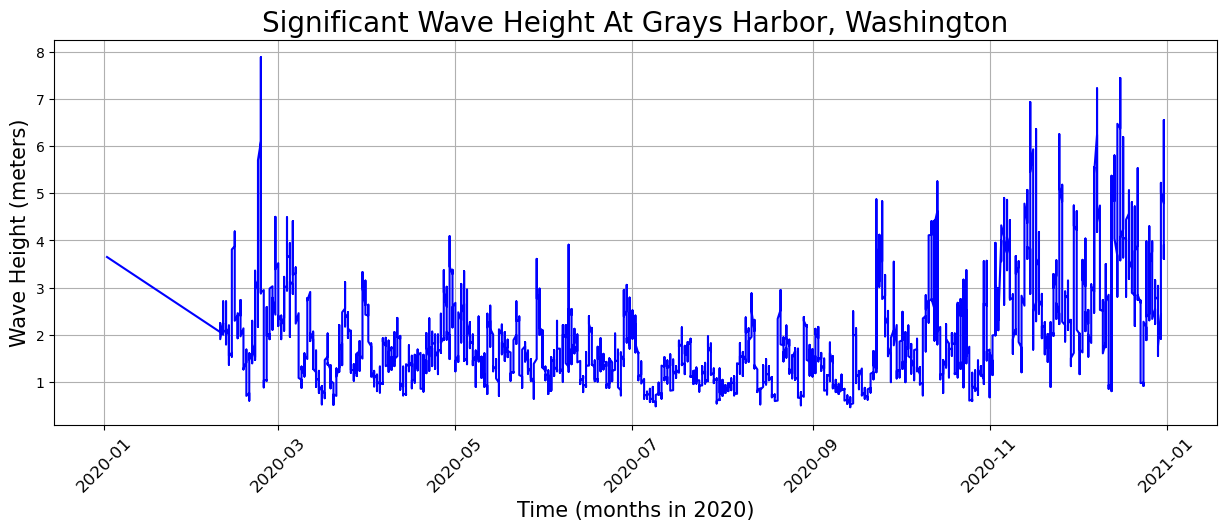

In [30]:
# step 2 clean and prepare data
graysharbor.columns = graysharbor.columns.str.strip().str.replace('#', '', regex=False)

#Check column names
print('Columns after cleaning:', graysharbor.columns.tolist())

#combine date columns into single DateTime column
graysharbor['DateTime'] = pd.to_datetime(
    graysharbor['YY'].astype(str) + '-' +  graysharbor['MM'].astype(str) +'-'+  graysharbor['DD'].astype(str))

# Convert wave height (WVHT) to numeric
graysharbor['WVHT'] = pd.to_numeric(graysharbor['WVHT'], errors='coerce')

# Step 3: Plot the data
plt.figure(figsize=(15, 5))
plt.plot(graysharbor['DateTime'], graysharbor['WVHT'], color='b', linestyle='-', linewidth=1.5)
plt.xlabel("Time (months in 2020)", fontsize=15)
plt.ylabel("Wave Height (meters)", fontsize=15)
plt.title("Significant Wave Height At Grays Harbor, Washington", fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.grid()

In [13]:
url2 = "https://www.ndbc.noaa.gov/data/historical/stdmet/46239h2020.txt.gz"

# Load data with pandas
pointsur = pd.read_csv(url2, 
                 compression='gzip', 
                 delim_whitespace=True, 
                 skiprows=[1])
pointsur.describe()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,17327.0,17327.000000,17327.000000,17327.000000,17327.000000,17327.0,17327.0,17327.0,17327.000000,17327.000000,17327.000000,17327.000000,17327.0,17327.0,17327.000000,17327.0,17327.0,17327.0
mean,2020.0,6.488371,15.774341,11.507936,29.511629,999.0,99.0,99.0,2.077019,11.899856,7.796234,288.758527,9999.0,999.0,13.469129,999.0,99.0,99.0
std,0.0,3.445084,8.810809,6.927315,19.794068,0.0,0.0,0.0,0.790461,3.041251,1.661633,36.043071,0.0,0.0,1.175975,0.0,0.0,0.0
min,2020.0,1.000000,1.000000,0.000000,0.000000,999.0,99.0,99.0,0.600000,3.850000,4.110000,155.000000,9999.0,999.0,10.400000,999.0,99.0,99.0
25%,2020.0,3.000000,8.000000,5.000000,26.000000,999.0,99.0,99.0,1.500000,9.880000,6.610000,286.000000,9999.0,999.0,12.600000,999.0,99.0,99.0
50%,2020.0,6.000000,16.000000,12.000000,30.000000,999.0,99.0,99.0,1.960000,11.760000,7.610000,300.000000,9999.0,999.0,13.400000,999.0,99.0,99.0
75%,2020.0,9.000000,23.000000,18.000000,56.000000,999.0,99.0,99.0,2.490000,14.290000,8.660000,310.000000,9999.0,999.0,14.200000,999.0,99.0,99.0
max,2020.0,12.000000,31.000000,23.000000,56.000000,999.0,99.0,99.0,5.720000,25.000000,16.290000,337.000000,9999.0,999.0,18.000000,999.0,99.0,99.0


Columns after cleaning: ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE', 'DateTime']


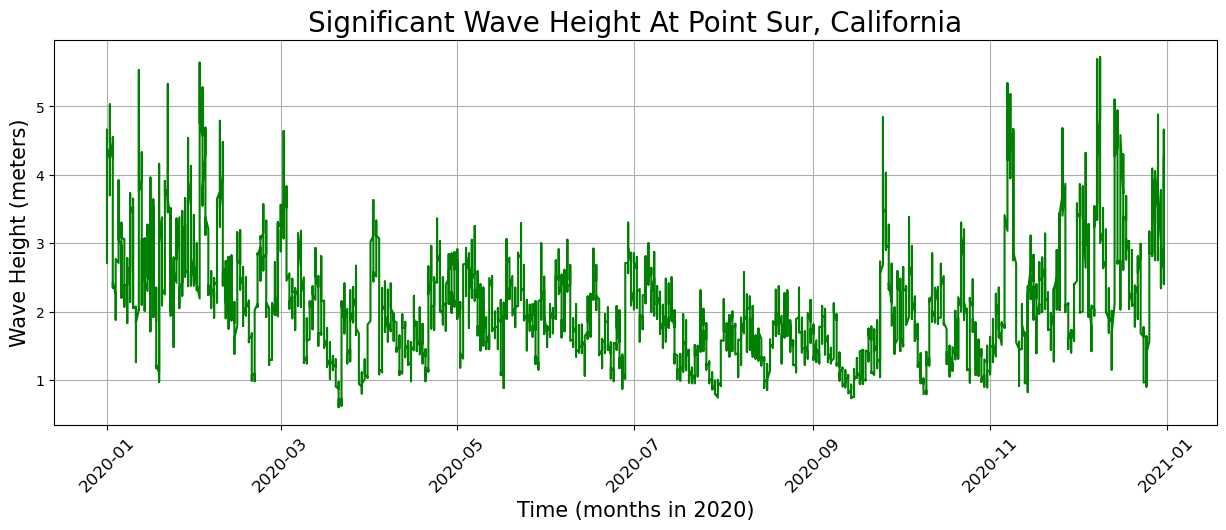

In [29]:
# step 2 clean and prepare data
pointsur.columns = pointsur.columns.str.strip().str.replace('#', '', regex=False)

#Check column names
print('Columns after cleaning:', pointsur.columns.tolist())

#combine date columns into single DateTime column
pointsur['DateTime'] = pd.to_datetime(
    pointsur['YY'].astype(str) + '-' +  pointsur['MM'].astype(str) +'-'+  pointsur['DD'].astype(str))

# Convert wave height (WVHT) to numeric
pointsur['WVHT'] = pd.to_numeric(pointsur['WVHT'], errors='coerce')

# Step 3: Plot the data
plt.figure(figsize=(15, 5))
plt.plot(pointsur['DateTime'], pointsur['WVHT'], color='green', linestyle='-', linewidth=1.5)
plt.xlabel("Time (months in 2020)", fontsize=15)
plt.ylabel("Wave Height (meters)", fontsize=15)
plt.title("Significant Wave Height At Point Sur, California", fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.grid()

In [16]:
url3 = "https://www.ndbc.noaa.gov/data/historical/stdmet/46254h2020.txt.gz"

# Load data with pandas
lajolla = pd.read_csv(url3, 
                 compression='gzip', 
                 delim_whitespace=True, 
                 skiprows=[1])
lajolla.describe()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,17394.0,17394.000000,17394.000000,17394.000000,17394.000000,17394.0,17394.0,17394.0,17394.000000,17394.000000,17394.000000,17394.000000,17394.0,17394.000000,17394.000000,17394.0,17394.0,17394.0
mean,2020.0,6.484880,15.781074,11.502990,34.611130,999.0,99.0,99.0,0.743325,9.652887,5.929894,284.156836,9999.0,849.300098,18.707031,999.0,99.0,99.0
std,0.0,3.440491,8.810246,6.918289,18.987327,0.0,0.0,0.0,0.305810,4.556165,1.151781,25.956429,0.0,353.669005,10.848170,0.0,0.0,0.0
min,2020.0,1.000000,1.000000,0.000000,0.000000,999.0,99.0,99.0,0.210000,2.860000,3.420000,229.000000,9999.0,7.800000,14.100000,999.0,99.0,99.0
25%,2020.0,4.000000,8.000000,6.000000,26.000000,999.0,99.0,99.0,0.530000,7.140000,5.040000,280.000000,9999.0,999.000000,16.000000,999.0,99.0,99.0
50%,2020.0,6.500000,16.000000,12.000000,28.000000,999.0,99.0,99.0,0.670000,9.090000,5.840000,285.000000,9999.0,999.000000,18.300000,999.0,99.0,99.0
75%,2020.0,9.000000,23.000000,17.000000,56.000000,999.0,99.0,99.0,0.880000,11.760000,6.650000,289.000000,9999.0,999.000000,20.800000,999.0,99.0,99.0
max,2020.0,12.000000,31.000000,23.000000,58.000000,999.0,99.0,99.0,3.080000,99.000000,11.340000,999.000000,9999.0,999.000000,999.000000,999.0,99.0,99.0


Columns after cleaning: ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE', 'DateTime']


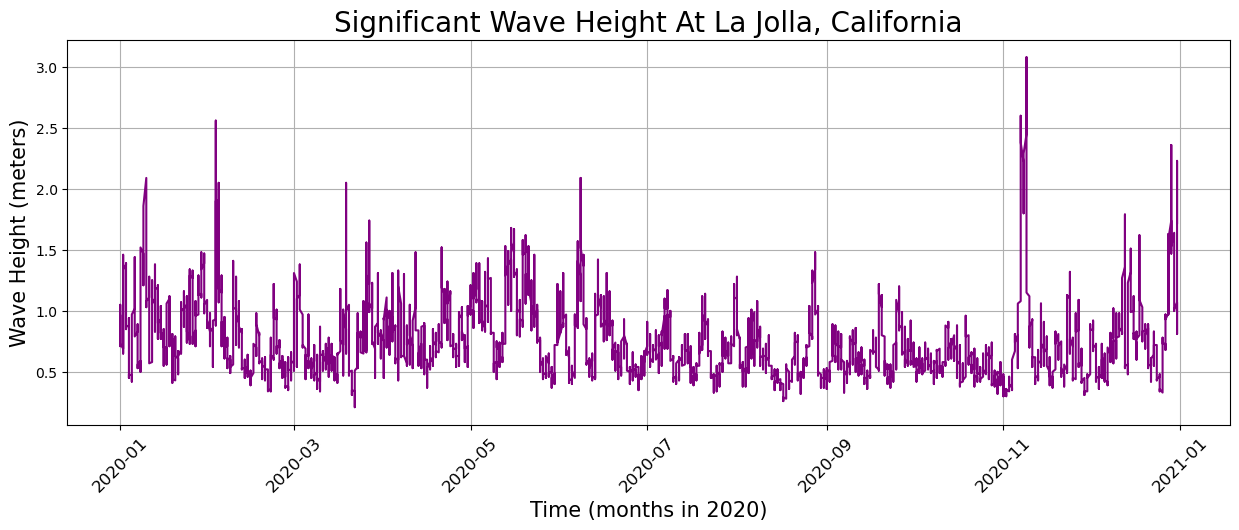

In [28]:
# step 2 clean and prepare data
lajolla.columns = lajolla.columns.str.strip().str.replace('#', '', regex=False)

#Check column names
print('Columns after cleaning:', lajolla.columns.tolist())

#combine date columns into single DateTime column
lajolla['DateTime'] = pd.to_datetime(
    lajolla['YY'].astype(str) + '-' +  lajolla['MM'].astype(str) +'-'+  lajolla['DD'].astype(str))

# Convert wave height (WVHT) to numeric
lajolla['WVHT'] = pd.to_numeric(lajolla['WVHT'], errors='coerce')

# Step 3: Plot the data
plt.figure(figsize=(15, 5))
plt.plot(lajolla['DateTime'], lajolla['WVHT'], color='purple', linestyle='-', linewidth=1.5)
plt.xlabel("Time (months in 2020)", fontsize=15)
plt.ylabel("Wave Height (meters)", fontsize=15)
plt.title("Significant Wave Height At La Jolla, California", fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.grid()

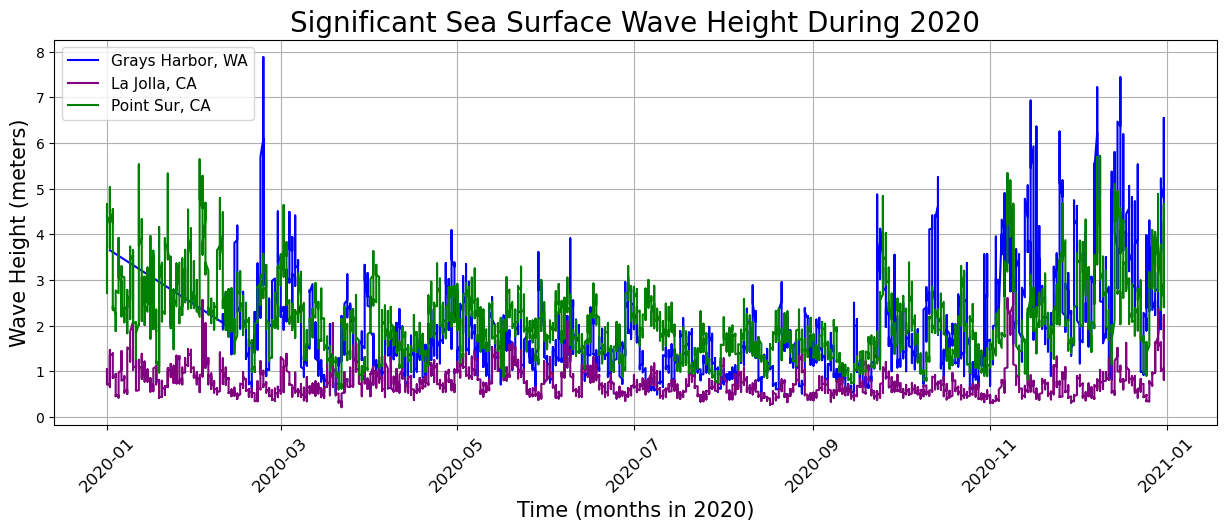

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(graysharbor['DateTime'], graysharbor['WVHT'], color='b', linestyle='-', linewidth=1.5, label="Grays Harbor, WA")
plt.plot(lajolla['DateTime'], lajolla['WVHT'], color='purple', linestyle='-', linewidth=1.5, label="La Jolla, CA")
plt.plot(pointsur['DateTime'], pointsur['WVHT'], color='green', linestyle='-', linewidth=1.5, label="Point Sur, CA")
plt.xlabel("Time (months in 2020)", fontsize=15)
plt.ylabel("Wave Height (meters)", fontsize=15)
plt.title("Significant Sea Surface Wave Height During 2020", fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.grid()
plt.legend(loc='upper left',fontsize=11)